In [1]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance
from model import nn, OptimizedNet
from torchvision import datasets, transforms
from torchsummary import summary

CUDA Available? False


In [2]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [4]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

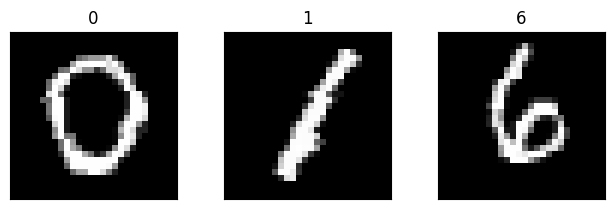

In [5]:
plot_dataset_sample(train_loader)

In [6]:
device = torch.device("cuda" if cuda else "cpu")
model = OptimizedNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1356 Batch_id=937 Accuracy=92.10: 100%|██████████| 938/938 [00:47<00:00, 19.96it/s]


Test set: Average loss: 0.0456, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0651 Batch_id=937 Accuracy=97.64: 100%|██████████| 938/938 [00:49<00:00, 19.09it/s]


Test set: Average loss: 0.0368, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0078 Batch_id=937 Accuracy=98.07: 100%|██████████| 938/938 [00:40<00:00, 23.30it/s]


Test set: Average loss: 0.0215, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0287 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:44<00:00, 21.14it/s]


Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0379 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:44<00:00, 21.15it/s]


Test set: Average loss: 0.0208, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0112 Batch_id=937 Accuracy=98.54: 100%|██████████| 938/938 [00:45<00:00, 20.62it/s]


Test set: Average loss: 0.0185, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0785 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:45<00:00, 20.56it/s]


Test set: Average loss: 0.0190, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0279 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:43<00:00, 21.38it/s]


Test set: Average loss: 0.0150, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.1910 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:43<00:00, 21.52it/s]


Test set: Average loss: 0.0149, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0464 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:43<00:00, 21.32it/s]


Test set: Average loss: 0.0145, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0013 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:47<00:00, 19.81it/s]


Test set: Average loss: 0.0143, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1712 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [00:44<00:00, 21.30it/s]


Test set: Average loss: 0.0138, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0084 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [00:44<00:00, 21.24it/s]


Test set: Average loss: 0.0135, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0052 Batch_id=937 Accuracy=99.13: 100%|██████████| 938/938 [00:44<00:00, 21.00it/s]


Test set: Average loss: 0.0132, Accuracy: 9956/10000 (99.56%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0142 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [00:43<00:00, 21.55it/s]


Test set: Average loss: 0.0131, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.0187 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:44<00:00, 20.92it/s]


Test set: Average loss: 0.0132, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.0015 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:45<00:00, 20.62it/s]


Test set: Average loss: 0.0129, Accuracy: 9960/10000 (99.60%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.0042 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:45<00:00, 20.57it/s]


Test set: Average loss: 0.0129, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.2548 Batch_id=937 Accuracy=99.04: 100%|██████████| 938/938 [00:45<00:00, 20.84it/s]


Test set: Average loss: 0.0132, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.0566 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:43<00:00, 21.37it/s]


Test set: Average loss: 0.0131, Accuracy: 9958/10000 (99.58%)

Adjusting learning rate of group 0 to 1.0000e-04.


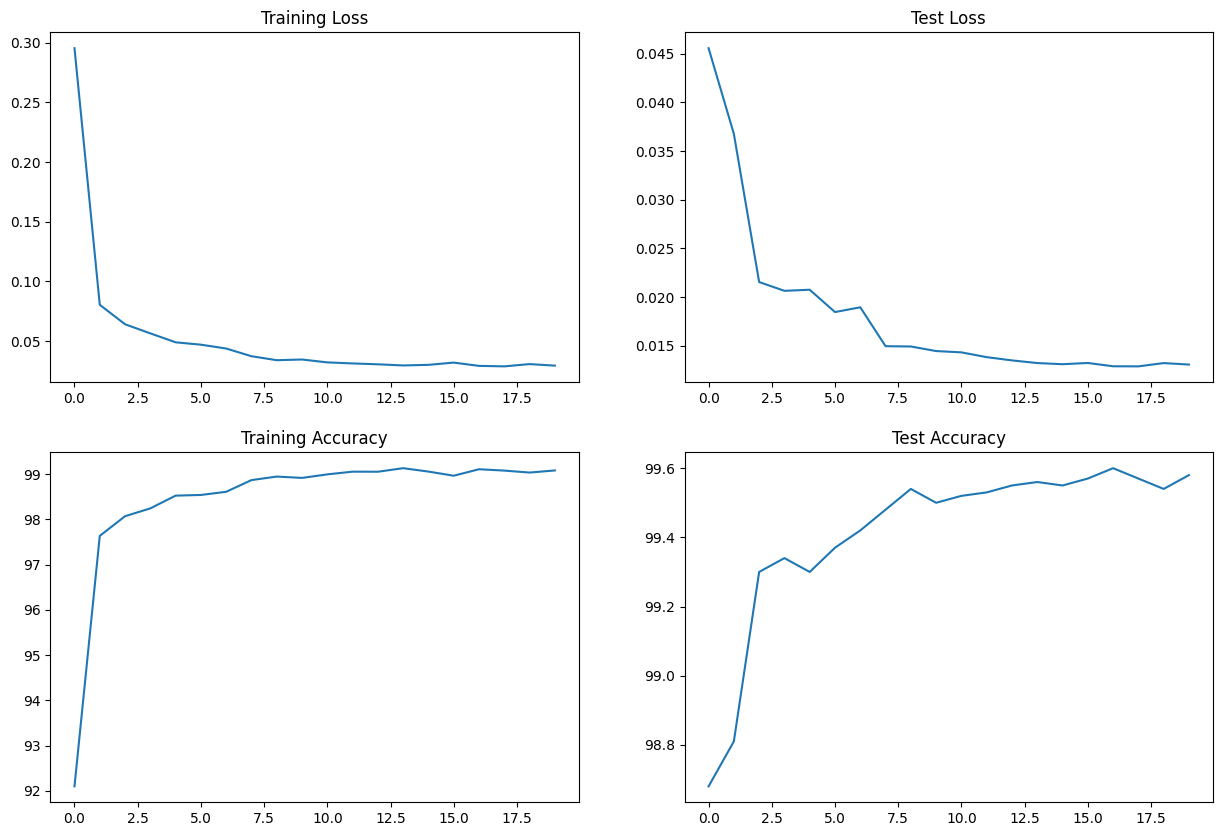

In [8]:
plot_model_performance()

In [9]:
device = torch.device("cuda" if cuda else "cpu")
model = OptimizedNet().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             584
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
         Dropout2d-8            [-1, 8, 28, 28]               0
         MaxPool2d-9            [-1, 8, 14, 14]               0
           Conv2d-10           [-1, 16, 14, 14]           1,168
             ReLU-11           [-1, 16, 14, 14]               0
      BatchNorm2d-12           [-1, 16, 14, 14]              32
        Dropout2d-13           [-1, 16, 14, 14]               0
           Conv2d-14           [-1, 16,